<a href="https://colab.research.google.com/github/Ssspoke/SMS_Spam/blob/main/spam_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nltk
!pip install gensim
!pip install torch
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 re

KeyboardInterrupt: 

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
import numpy as np
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm.notebook import trange
import nltk.downloader
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Загрузка данных
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

In [4]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
nltk.download('punkt_tab')
df['tokens'] = df['text'].apply(nltk.word_tokenize)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:
print('The dataframe is as shown below\n', df)


The dataframe is as shown below
      label                                               text  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   
...    ...                                                ...   
5567  spam  This is the 2nd time we have tried 2 contact u...   
5568   ham              Will Ì_ b going to esplanade fr home?   
5569   ham  Pity, * was in mood for that. So...any other s...   
5570   ham  The guy did some bitching but I acted like i'd...   
5571   ham                         Rofl. Its true to its name   

                                                 tokens  
0     [Go, until, jurong, point, ,, crazy, .., Avail...  
1              [Ok, lar, ..., Joking, wif, u, oni, ...]  
2     [Free,

In [8]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [16]:
# TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf_tfidf = LogisticRegression(max_iter=1000)
clf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

print("TF-IDF results (lr):")
print(classification_report(y_test, y_pred_tfidf))

TF-IDF results (lr):
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



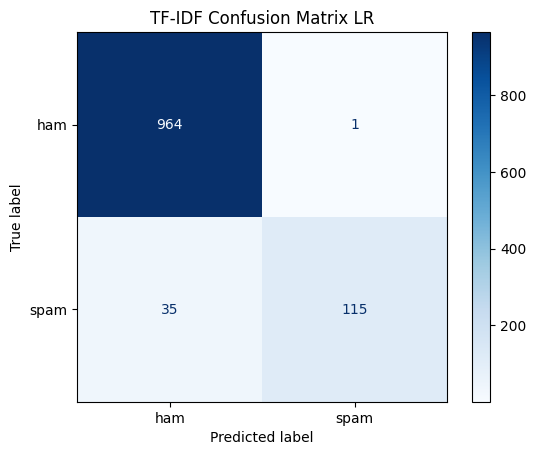

In [17]:
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=clf_tfidf.classes_)
disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=clf_tfidf.classes_)
disp_tfidf.plot(cmap=plt.cm.Blues)
plt.title("TF-IDF Confusion Matrix LR")
plt.show()


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [28]:
# DecisionTreeClassifier
# Применение TF-IDF преобразования к данным
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = DecisionTreeClassifier().fit(X_train_tfidf, y_train)

#Prediction
y_pred_dt = model.predict(X_test_tfidf)
print("TF-IDF results (dt):")
print(classification_report(y_test, y_pred_dt))

TF-IDF results (dt):
              precision    recall  f1-score   support

         ham       0.97      0.98      0.98       965
        spam       0.89      0.80      0.84       150

    accuracy                           0.96      1115
   macro avg       0.93      0.89      0.91      1115
weighted avg       0.96      0.96      0.96      1115



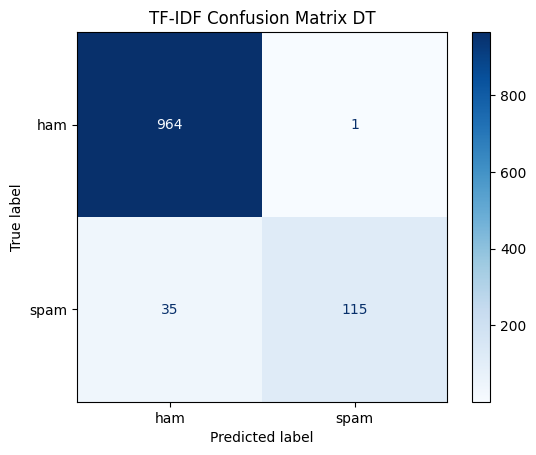

In [20]:
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=clf_tfidf.classes_)
disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=clf_tfidf.classes_)
disp_tfidf.plot(cmap=plt.cm.Blues)
plt.title("TF-IDF Confusion Matrix DT")
plt.show()

In [22]:
# RandomForestClassifier
# Применение TF-IDF преобразования к данным
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = RandomForestClassifier().fit(X_train_tfidf, y_train)

#Prediction
y_pred_rf = model.predict(X_test_tfidf)
print("TF-IDF results (rf):")
print(classification_report(y_test, y_pred_rf))

TF-IDF results (rf):
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



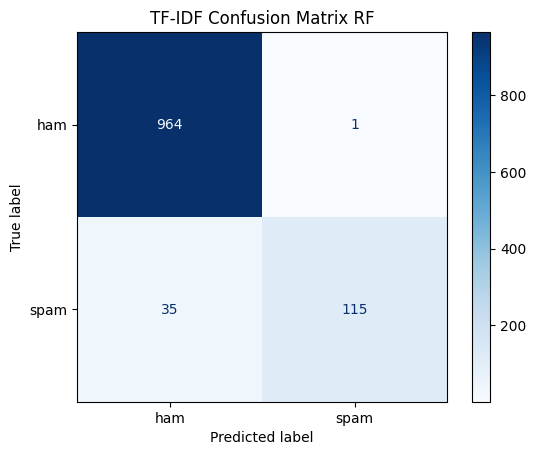

In [23]:
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=clf_tfidf.classes_)
disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=clf_tfidf.classes_)
disp_tfidf.plot(cmap=plt.cm.Blues)
plt.title("TF-IDF Confusion Matrix RF")
plt.show()

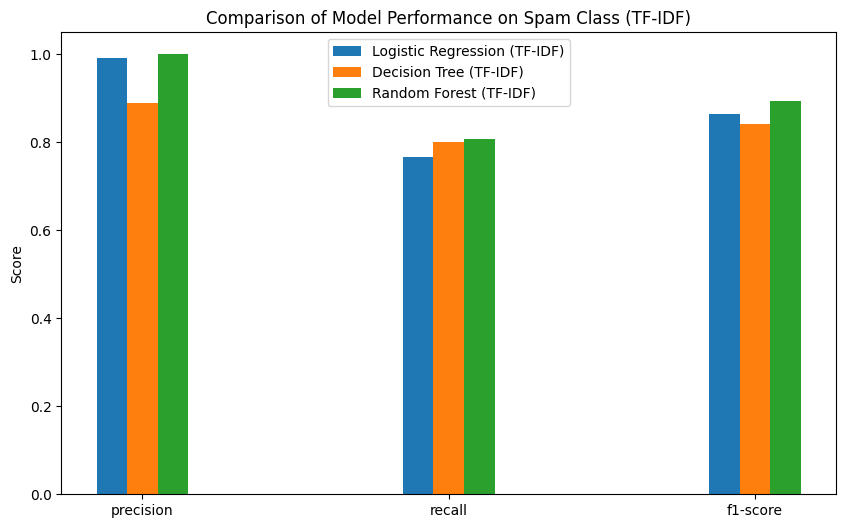

In [37]:
# Агрегируем результаты отчета о классификации для сравнения
results = {
    'Logistic Regression (TF-IDF)': classification_report(y_test, y_pred_tfidf, output_dict=True)['spam'],
    'Decision Tree (TF-IDF)': classification_report(y_test, y_pred_dt, output_dict=True)['spam'],
    'Random Forest (TF-IDF)': classification_report(y_test, y_pred_rf, output_dict=True)['spam'] # Note: y_pred_rf needs to be from the RF model # Примечание: y_pred_rf должен быть из модели RF
}

metrics = ['precision', 'recall', 'f1-score']
model_names = list(results.keys())

x = np.arange(len(metrics))  # the label locations # положения меток
width = 0.2  # the width of the bars # ширина столбцов

fig, ax = plt.subplots(figsize=(10, 6))

for i, (model_name, model_results) in enumerate(results.items()):
    ax.bar(x + i * width, [model_results[metric] for metric in metrics], width, label=model_name)

# Добавляем текст для меток, заголовка и пользовательских меток оси x и т. д.
ax.set_ylabel('Score') # Метка оси Y
ax.set_title('Comparison of Model Performance on Spam Class (TF-IDF)') # Заголовок: Сравнение производительности моделей на классе спама (TF-IDF)
ax.set_xticks(x + width * (len(model_names) - 1) / 2)
ax.set_xticklabels(metrics) # Метки оси X
ax.legend()

plt.show()

In [25]:
# Word Embeddings (GloVe)
glove = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [26]:
def get_embedding(text):
    tokens = nltk.word_tokenize(text.lower())
    vectors = [glove[word] for word in tokens if word in glove]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(glove.vector_size)


In [27]:
X_train_emb = np.vstack(X_train.apply(get_embedding))
X_test_emb = np.vstack(X_test.apply(get_embedding))
